In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv("air_quality_india.csv")
df

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [3]:
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [4]:
df.tail()

,Timestamp,Year,Month,Day,Hour,PM2.5
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29
36191,2022-06-04 15:00:00,2022,6,4,15,40.67


In [5]:
df.shape

(36192, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [7]:
df.isnull().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

In [8]:
df.describe().T.style.background_gradient(cmap="Blues")

,count,mean,std,min,25%,50%,75%,max
Year,36192.000000,2019.682278,1.345011,2017.000000,2019.000000,2020.000000,2021.000000,2022.000000
Month,36192.000000,6.331841,3.593321,1.000000,3.000000,6.000000,10.000000,12.000000
Day,36192.000000,15.716401,8.859769,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,36192.000000,11.477840,6.925088,0.000000,5.000000,11.000000,17.000000,23.000000
PM2.5,36192.000000,49.308429,24.863511,7.020000,28.080000,45.730000,64.520000,245.630000


In [9]:
print(df["PM2.5"].describe())

count    36192.000000
mean        49.308429
std         24.863511
min          7.020000
25%         28.080000
50%         45.730000
75%         64.520000
max        245.630000
Name: PM2.5, dtype: float64


In [10]:
df.nunique()

Timestamp    36192
Year             6
Month           12
Day             31
Hour            24
PM2.5         9202
dtype: int64

In [11]:
pd.DataFrame(df["Year"].value_counts())

,count
Year,
2020,8356
2021,8283
2019,7685
2018,7537
2022,3194
2017,1137


In [12]:
pd.DataFrame(df["Month"].value_counts().sort_index(ascending=True))

,count
Month,
1,3546
2,3250
3,3529
4,3083
5,3212
6,2743
7,2397
8,2492
9,2495


In [13]:
pd.DataFrame(df["Hour"].value_counts().sort_values(ascending=False))

,count
Hour,
8,1524
6,1523
5,1519
1,1518
23,1517
2,1515
9,1514
4,1514
7,1512


In [14]:
pd.DataFrame(df["PM2.5"].sort_values(ascending=False).head(15))

,PM2.5
7649,245.63
14836,234.83
7650,232.03
14837,230.05
7648,223.21
14835,219.07
7646,212.56
7647,207.41
23588,196.88
23593,193.80


In [15]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract new features
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                                 else 'Summer' if x in [3, 4, 5] 
                                                 else 'Monsoon' if x in [6, 7, 8]
                                                 else 'Autumn')

print(df.head())  # Check the new features

            Timestamp  Year  Month  Day  Hour   PM2.5  Day_of_Week  Season
0 2017-11-07 12:00:00  2017     11    7    12   64.51            1  Autumn
1 2017-11-07 13:00:00  2017     11    7    13   69.95            1  Autumn
2 2017-11-07 14:00:00  2017     11    7    14   92.79            1  Autumn
3 2017-11-07 15:00:00  2017     11    7    15  109.66            1  Autumn
4 2017-11-07 16:00:00  2017     11    7    16  116.50            1  Autumn


In [16]:
df

,Timestamp,Year,Month,Day,Hour,PM2.5,Day_of_Week,Season
0,2017-11-07 12:00:00,2017,11,7,12,64.51,1,Autumn
1,2017-11-07 13:00:00,2017,11,7,13,69.95,1,Autumn
2,2017-11-07 14:00:00,2017,11,7,14,92.79,1,Autumn
3,2017-11-07 15:00:00,2017,11,7,15,109.66,1,Autumn
4,2017-11-07 16:00:00,2017,11,7,16,116.50,1,Autumn
...,...,...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89,5,Monsoon
36188,2022-06-04 12:00:00,2022,6,4,12,33.83,5,Monsoon
36189,2022-06-04 13:00:00,2022,6,4,13,33.05,5,Monsoon
36190,2022-06-04 14:00:00,2022,6,4,14,35.29,5,Monsoon


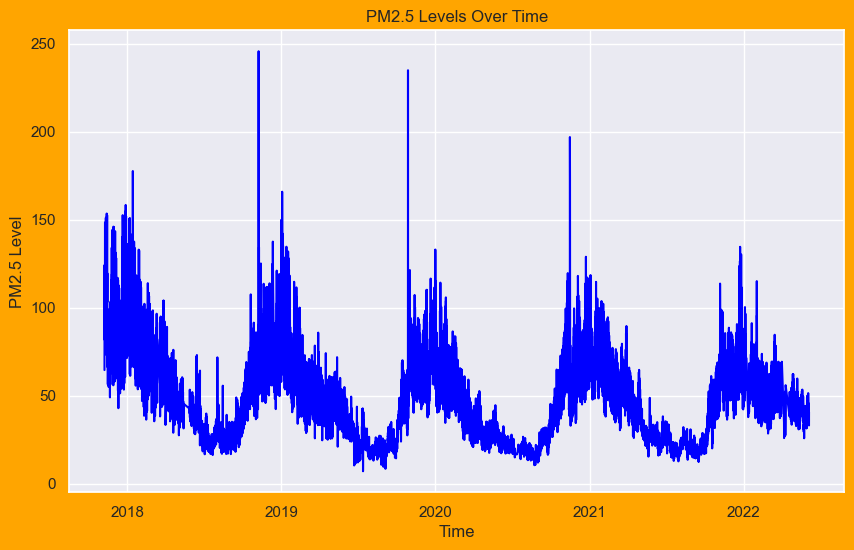

In [17]:
plt.figure(figsize=(10,6), facecolor="orange", edgecolor="red")
plt.plot(df['Timestamp'], df['PM2.5'], color='blue')  # Change color to blue
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 Level')
plt.show()


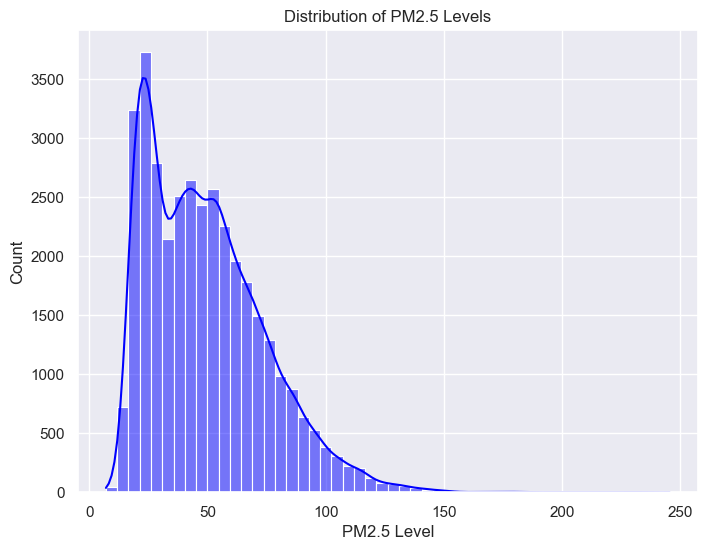

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df['PM2.5'], bins=50, kde=True, color='blue')  # Change color to green
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Level')
plt.show()


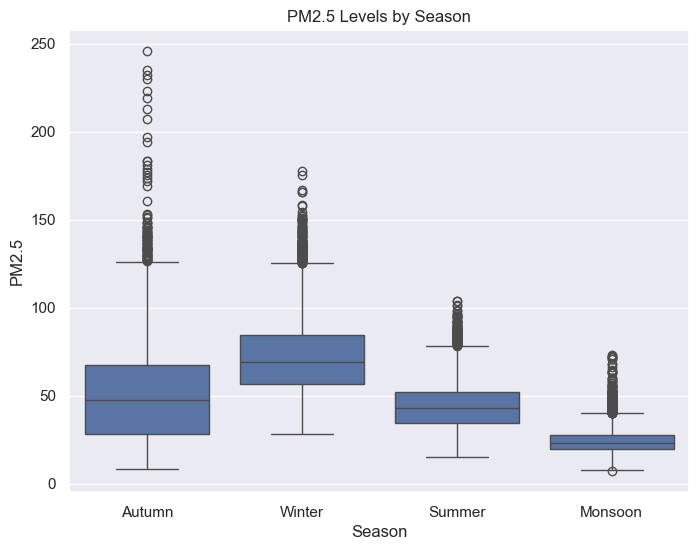

In [19]:
# Box plot by season
plt.figure(figsize=(8,6))
sns.boxplot(x='Season', y='PM2.5', data=df)
plt.title('PM2.5 Levels by Season')
plt.show()

Winter and Autumn experience higher PM2.5 concentrations, with more frequent extreme pollution events (as seen by the outliers). Summer and Monsoon, especially Monsoon, experience cleaner air with fewer outliers and more consistent PM2.5 levels.

This plot indicates that the air quality in India is significantly worse during Winter and Autumn, possibly due to factors like lower temperatures, industrial activities, or seasonal agricultural burning.

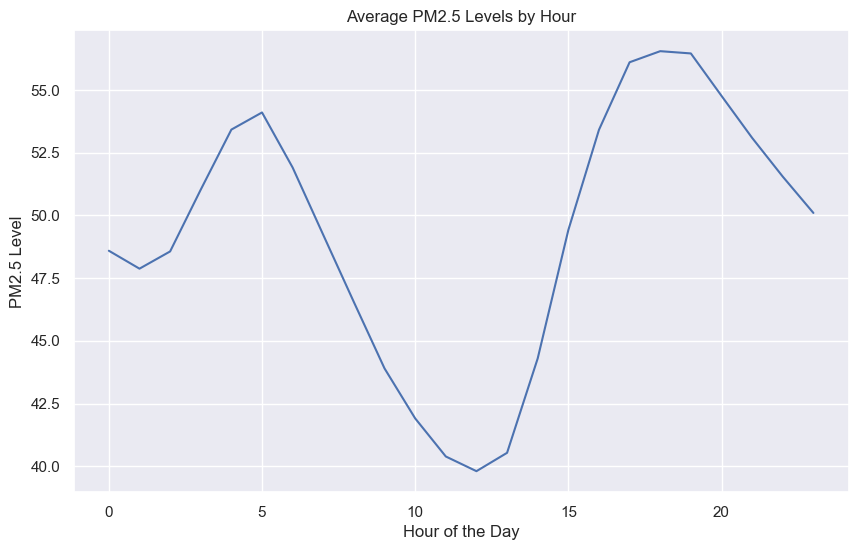

In [20]:
# Average PM2.5 by hour
hourly_avg = df.groupby('Hour')['PM2.5'].mean()
plt.figure(figsize=(10,6))
hourly_avg.plot()
plt.title('Average PM2.5 Levels by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('PM2.5 Level')
plt.show()

PM2.5 levels increase during the early morning hours (around 5 a.m.), peaking around this time. This may be due to increased vehicle traffic, industrial activity, and cold weather trapping pollutants closer to the ground (inversion effect). Levels gradually decrease during the late morning and early afternoon, reaching their lowest point around noon (around 11 a.m. to 1 p.m.). This may be due to pollutants being dispersed as the atmosphere warms and traffic/industrial activity slows.

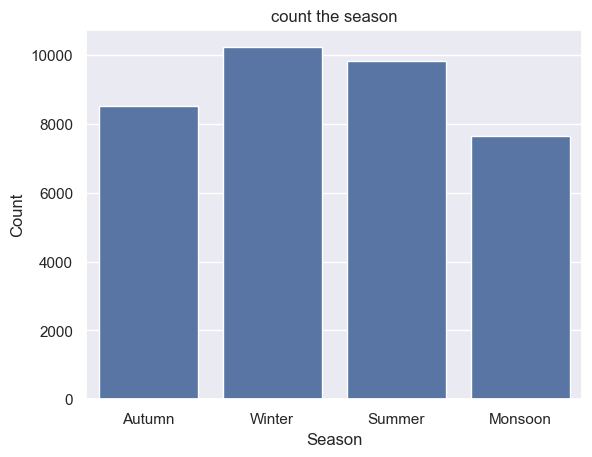

In [21]:
#count plot to season

sns.countplot(data =df ,x = "Season")
plt.title('count the season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17520\1857195652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Month", palette='Set2')  # Use the 'Set2' color palette for different colors


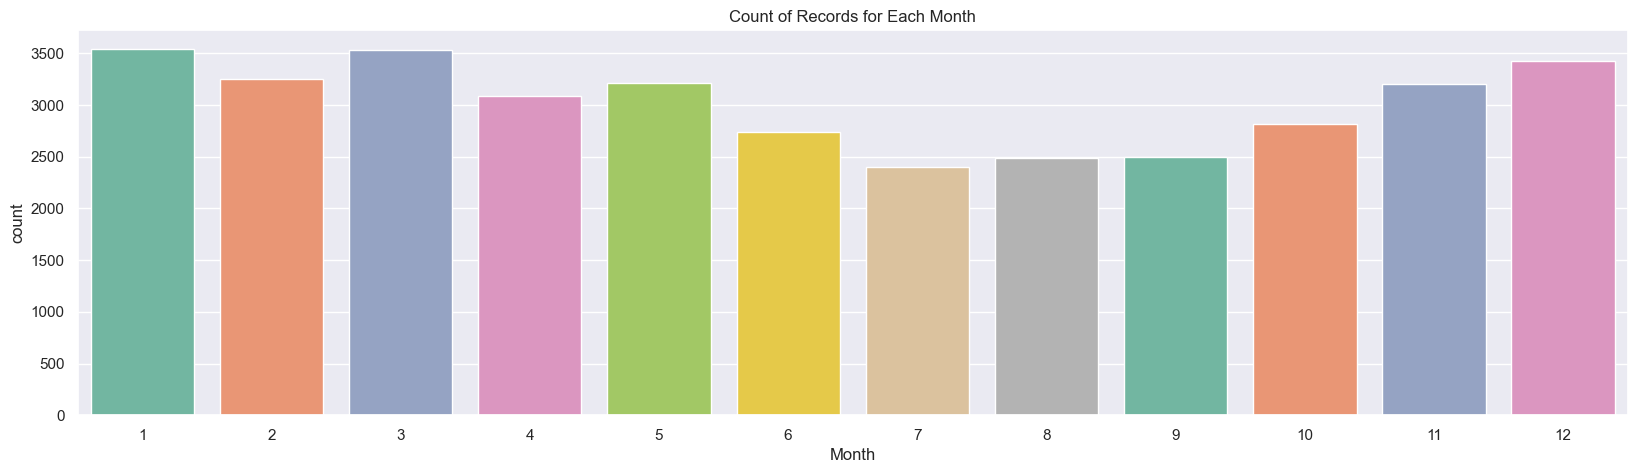

In [22]:
sns.set(rc={"figure.figsize": (20,5)})
sns.countplot(data=df, x="Month", palette='Set2')  # Use the 'Set2' color palette for different colors
plt.title('Count of Records for Each Month')
plt.xlabel('Month')
plt.show()


<Axes: xlabel='Month', ylabel='PM2.5'>

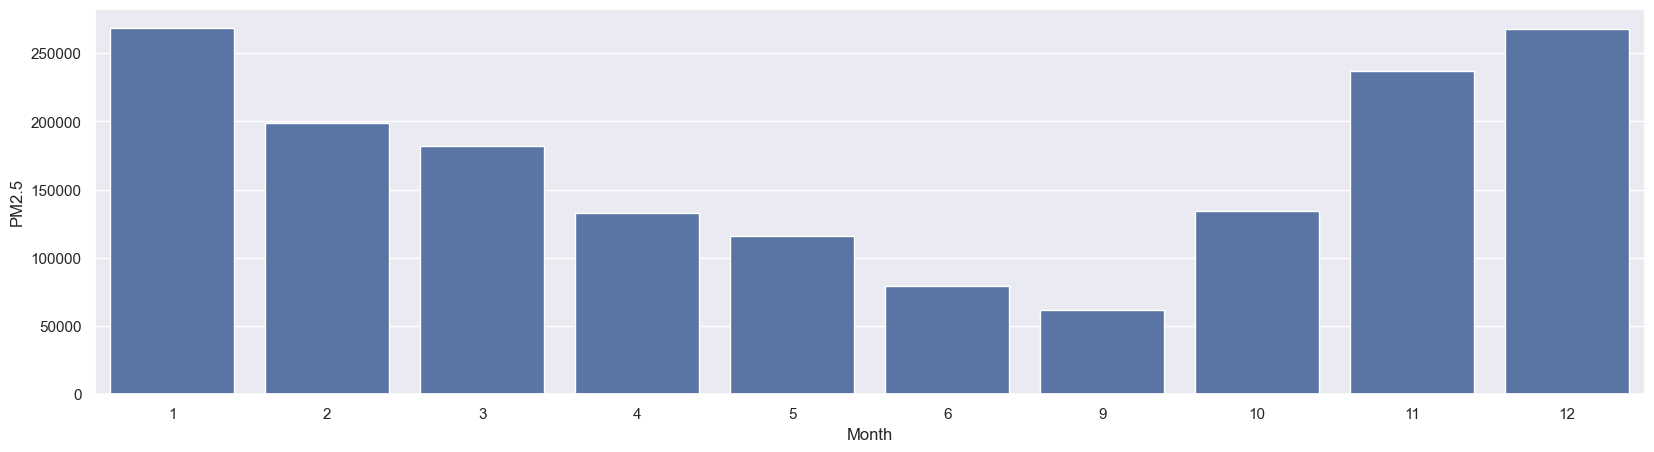

In [23]:
#This is a bar plot that displays the sum of PM2.5 levels for each month.
air = df.groupby(["Month"], as_index = False)["PM2.5"].sum().sort_values(by="PM2.5",ascending = False).head(10)

sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data = air,x = "Month",y = "PM2.5" )

This plot provides an overview of the total PM2.5 pollution over each month. Winter months (January and December) appear to have higher PM2.5 levels, whereas monsoon or summer months likely have lower levels. This analysis could be valuable for understanding seasonal trends in air pollution and for planning interventions during months with higher pollution levels.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17520\1960997510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=air, x="Day_of_Week", y="PM2.5", palette='viridis')  # Use a color palette for different colors


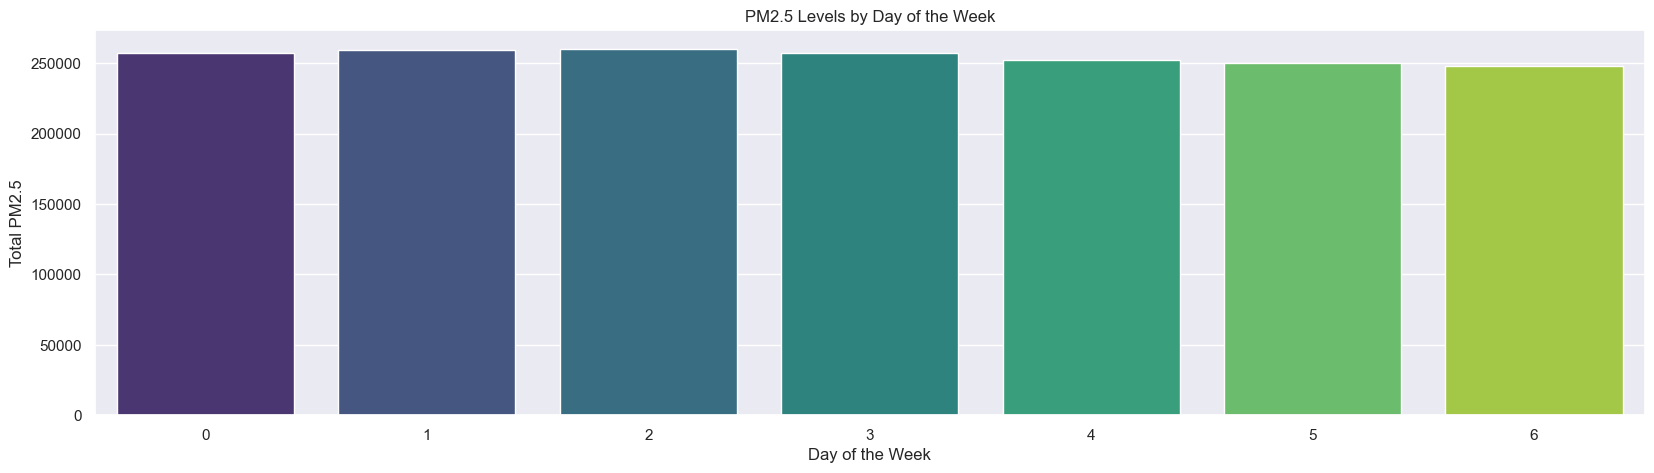

In [24]:
air = df.groupby(["Day_of_Week"], as_index=False)["PM2.5"].sum().sort_values(by="PM2.5", ascending=False).head(10)

sns.set(rc={"figure.figsize": (20,5)})
sns.barplot(data=air, x="Day_of_Week", y="PM2.5", palette='viridis')  # Use a color palette for different colors
plt.title('PM2.5 Levels by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total PM2.5')
plt.show()


This graph provides an overview of total PM2.5 pollution over each day of the week. PM2.5 levels appear to be very similar as you can see from the figure.

Outliers :

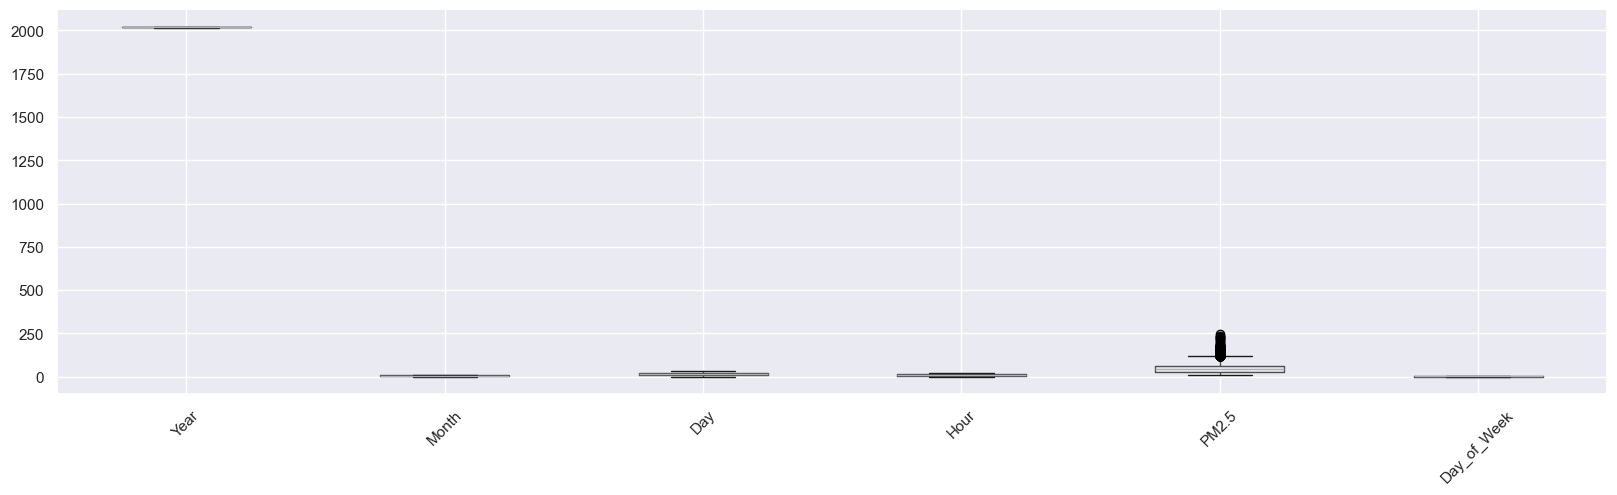

In [25]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()


<Axes: ylabel='PM2.5'>

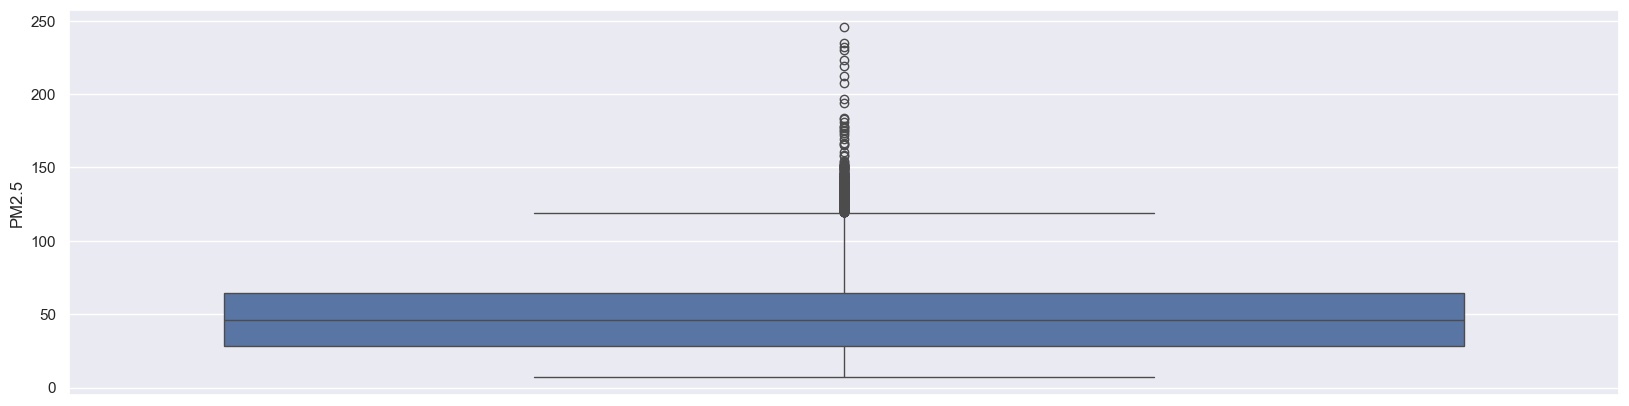

In [26]:
sns.boxplot(df["PM2.5"])

In [27]:
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['PM2.5'] < (Q1 - 1.5 * IQR)) | (df['PM2.5'] > (Q3 + 1.5 * IQR)))]

In [28]:
df_no_outliers.head(2)

,Timestamp,Year,Month,Day,Hour,PM2.5,Day_of_Week,Season
0,2017-11-07 12:00:00,2017,11,7,12,64.51,1,Autumn
1,2017-11-07 13:00:00,2017,11,7,13,69.95,1,Autumn


Handling Outliers :

In [29]:
upper_limit = df['PM2.5'].quantile(0.95)
lower_limit = df['PM2.5'].quantile(0.05)

df['PM2.5'] = np.where(df['PM2.5'] > upper_limit, upper_limit, df['PM2.5'])
df['PM2.5'] = np.where(df['PM2.5'] < lower_limit, lower_limit, df['PM2.5'])
df.head(8)

,Timestamp,Year,Month,Day,Hour,PM2.5,Day_of_Week,Season
0,2017-11-07 12:00:00,2017,11,7,12,64.5100,1,Autumn
1,2017-11-07 13:00:00,2017,11,7,13,69.9500,1,Autumn
2,2017-11-07 14:00:00,2017,11,7,14,92.7900,1,Autumn
3,2017-11-07 15:00:00,2017,11,7,15,95.2245,1,Autumn
4,2017-11-07 16:00:00,2017,11,7,16,95.2245,1,Autumn
5,2017-11-07 17:00:00,2017,11,7,17,95.2245,1,Autumn
6,2017-11-07 18:00:00,2017,11,7,18,95.2245,1,Autumn
7,2017-11-07 19:00:00,2017,11,7,19,95.2245,1,Autumn


In [30]:
df = df.drop(["Timestamp"],axis=1)
df

,Year,Month,Day,Hour,PM2.5,Day_of_Week,Season
0,2017,11,7,12,64.5100,1,Autumn
1,2017,11,7,13,69.9500,1,Autumn
2,2017,11,7,14,92.7900,1,Autumn
3,2017,11,7,15,95.2245,1,Autumn
4,2017,11,7,16,95.2245,1,Autumn
...,...,...,...,...,...,...,...
36187,2022,6,4,11,35.8900,5,Monsoon
36188,2022,6,4,12,33.8300,5,Monsoon
36189,2022,6,4,13,33.0500,5,Monsoon
36190,2022,6,4,14,35.2900,5,Monsoon


Encoder :

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Season"] = le.fit_transform(df['Season'])
df

,Year,Month,Day,Hour,PM2.5,Day_of_Week,Season
0,2017,11,7,12,64.5100,1,0
1,2017,11,7,13,69.9500,1,0
2,2017,11,7,14,92.7900,1,0
3,2017,11,7,15,95.2245,1,0
4,2017,11,7,16,95.2245,1,0
...,...,...,...,...,...,...,...
36187,2022,6,4,11,35.8900,5,1
36188,2022,6,4,12,33.8300,5,1
36189,2022,6,4,13,33.0500,5,1
36190,2022,6,4,14,35.2900,5,1


Correlation :

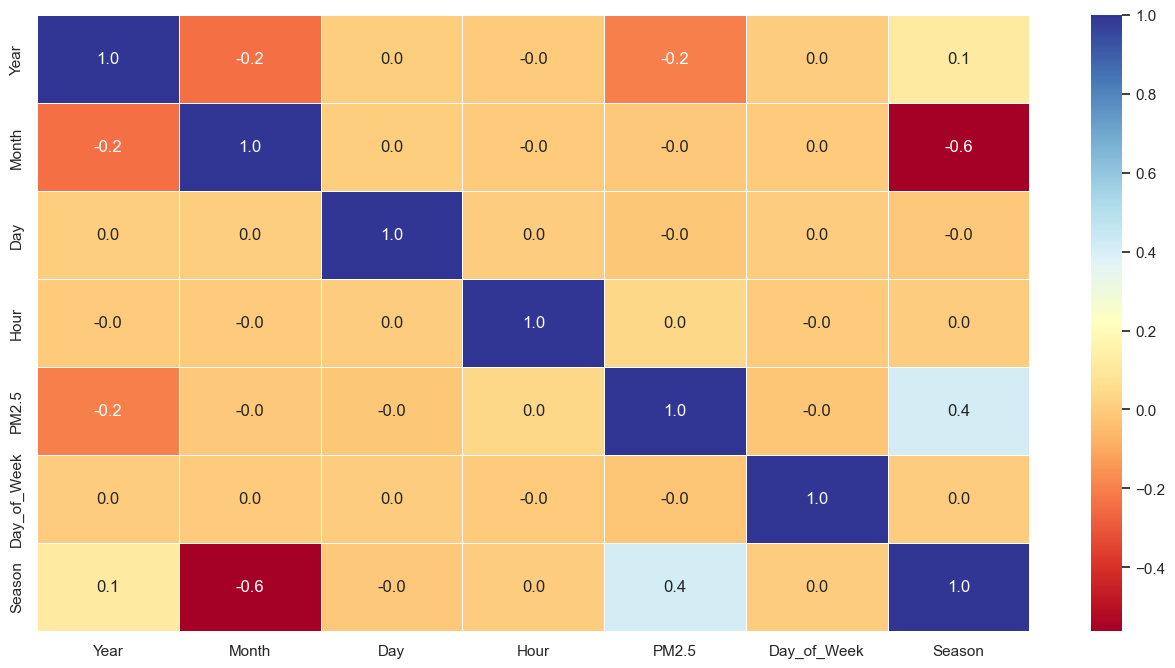

In [32]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, fmt=".1f", linewidths=.5)  # Professional 'RdYlBu' color palette
plt.show()



Split Data into Train and Test :

In [33]:
X = df.drop(["PM2.5"],axis=1)
y = df["PM2.5"]
X


,Year,Month,Day,Hour,Day_of_Week,Season
0,2017,11,7,12,1,0
1,2017,11,7,13,1,0
2,2017,11,7,14,1,0
3,2017,11,7,15,1,0
4,2017,11,7,16,1,0
...,...,...,...,...,...,...
36187,2022,6,4,11,5,1
36188,2022,6,4,12,5,1
36189,2022,6,4,13,5,1
36190,2022,6,4,14,5,1


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

In [35]:
X_train

,Year,Month,Day,Hour,Day_of_Week,Season
3525,2018,4,27,11,4,2
32483,2021,12,9,23,3,3
2390,2018,3,1,3,3,2
30351,2021,9,4,4,5,0
25856,2021,2,17,13,2,3
...,...,...,...,...,...,...
16850,2020,1,21,11,1,3
6265,2018,9,10,3,0,0
11284,2019,4,22,5,0,2
860,2017,12,19,22,1,3


In [36]:
pd.DataFrame(y_test)

,PM2.5
23802,77.4400
14854,38.7000
1278,95.2245
12837,18.5000
33196,40.5400
...,...
8237,95.2245
7539,56.8500
16134,73.9800
28474,23.5700


In [37]:
pd.DataFrame(y_train)

,PM2.5
3525,41.8900
32483,54.6500
2390,75.8700
30351,18.5000
25856,46.6500
...,...
16850,58.3700
6265,24.7200
11284,46.7900
860,95.2245


Models Regression

In [38]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [39]:
def all(model):
    model.fit(X_train,y_train.astype(int))
    y_pred = model.predict(X_test)
    print("score_test=", model.score(X_test ,y_test.astype(int))*100)
    print("score_train=", model.score(X_train ,y_train.astype(int))*100)   
    print("mean_absolute_error=", metrics.mean_absolute_error(y_test, y_pred))

In [40]:
model1=KNeighborsRegressor(n_neighbors=8,algorithm="kd_tree", leaf_size=40)
all(model1)

score_test= 88.90175058215841
score_train= 91.80352162591005
mean_absolute_error= 5.547006009117281


In [41]:
model2=DecisionTreeRegressor()
all(model2)

score_test= 95.1777786994126
score_train= 100.0
mean_absolute_error= 2.951579154579361


In [42]:
model3=LinearRegression()
all(model3)

score_test= 29.35959256968831
score_train= 28.10251270656642
mean_absolute_error= 15.560877359513986


In [43]:
model4=RandomForestRegressor(n_estimators=200,max_depth=6)
all(model4)

score_test= 83.31738712393894
score_train= 83.30708249720433
mean_absolute_error= 7.0040717957539975


In [44]:
model5=GradientBoostingRegressor()
all(model5)

score_test= 85.54839788224264
score_train= 85.74544318400983
mean_absolute_error= 6.398419604136974


The model Decision Tree Regressor is the highest accuracy

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error,r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

models = {
    'lr': LinearRegression(),
    'GbR': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(n_neighbors=8,algorithm="kd_tree", leaf_size=40),
    'Dtr': DecisionTreeRegressor(),
    'Rfr': RandomForestRegressor(n_estimators=200,max_depth=6),
}

for name, md in models.items():
    md.fit(X_train, y_train)
    y_pred = md.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}: MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R2 Score: {r2}")

lr: MAE: 15.619237670923445, MSE: 359.62066855024966, RMSE: 18.96366706494948, MAPE: 41.52442871317679, R2 Score: 0.29357418159888415
GbR: MAE: 6.4497706884182895, MSE: 73.90256431270998, RMSE: 8.596660067299974, MAPE: 14.772926814073564, R2 Score: 0.8548284788885753
KNN: MAE: 5.55847417633651, MSE: 56.455451094946305, RMSE: 7.513684255739411, MAPE: 12.833660792035392, R2 Score: 0.8891009562833874
Dtr: MAE: 2.895376571349634, MSE: 24.695161656237044, RMSE: 4.96942266830233, MAPE: 6.0449394448493345, R2 Score: 0.9514897187253366
Rfr: MAE: 7.035512867431378, MSE: 84.72357370602018, RMSE: 9.20454092858629, MAPE: 16.283018896480908, R2 Score: 0.8335720798962376


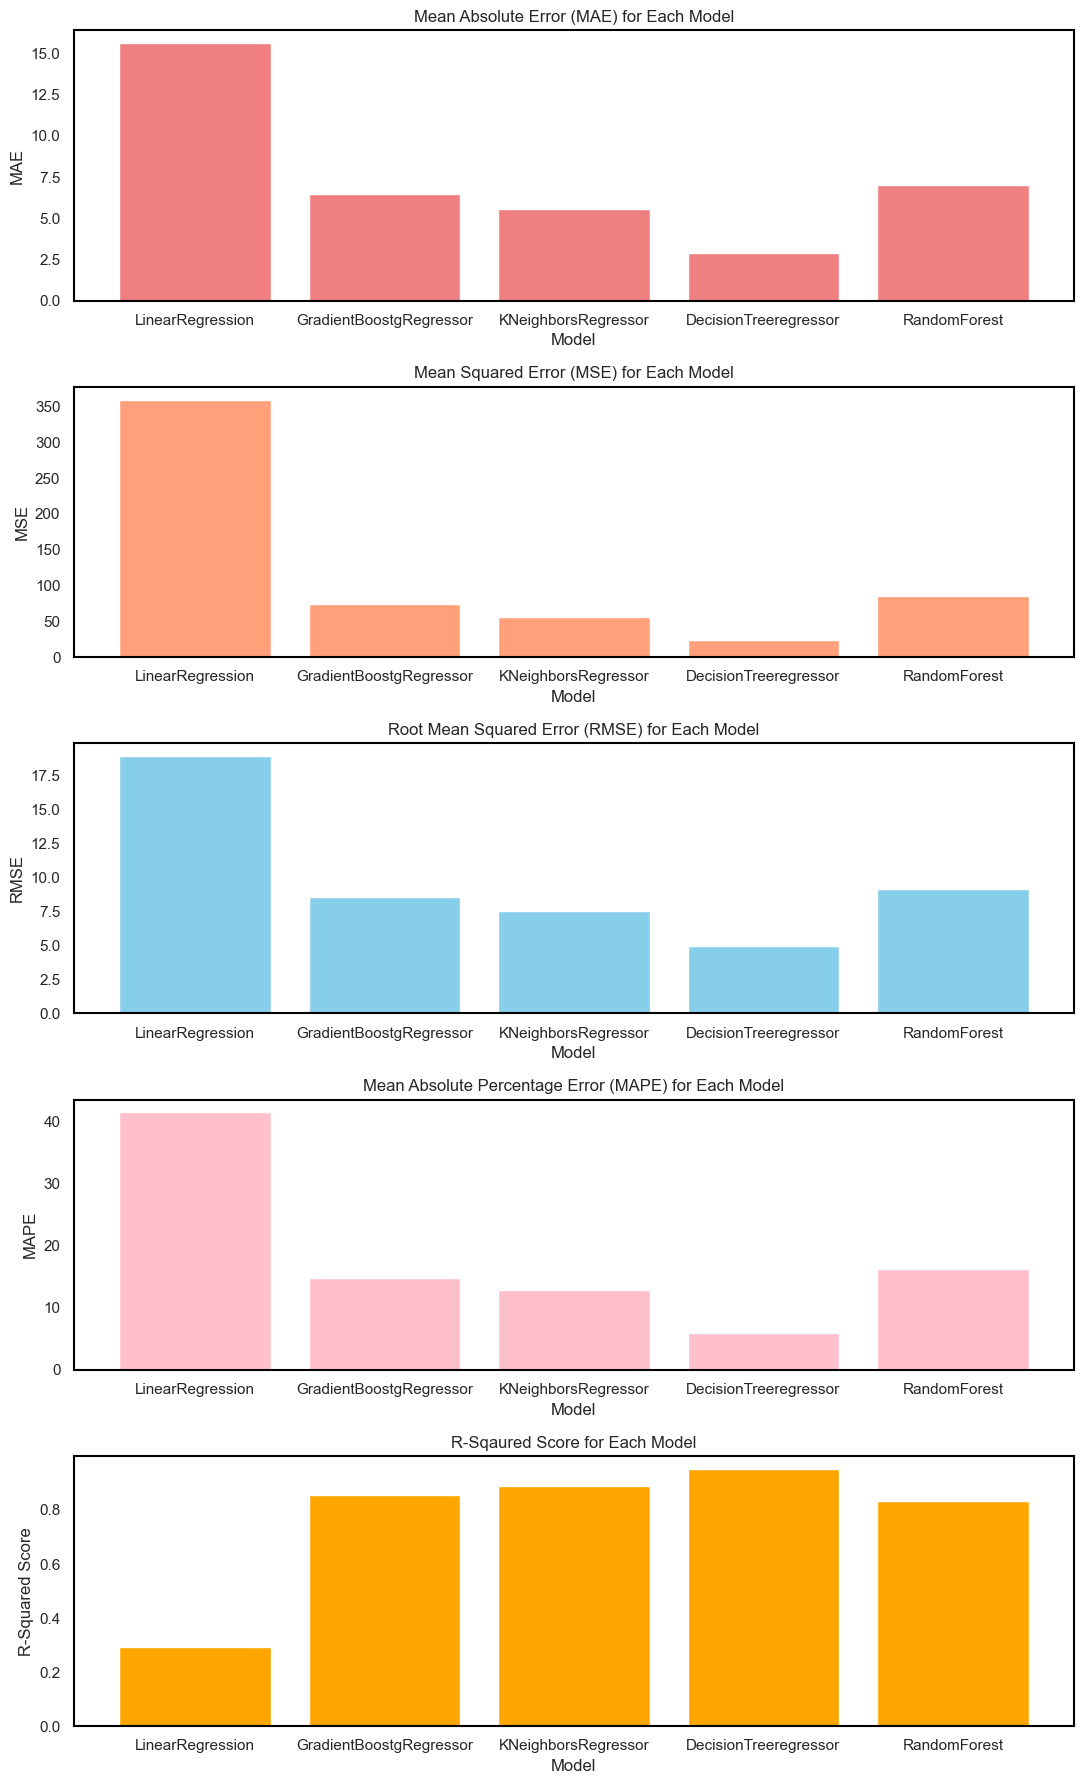

In [46]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'GradientBoostgRegressor', 'KNeighborsRegressor', 'DecisionTreeregressor', 'RandomForest']
mae_scores = [15.619237670923445, 6.4497706884182895,5.55847417633651,2.883991020859235,7.030034126734294 ]
mse_scores = [359.62066855024966,73.90256431271001,56.455451094946305,24.430552838720807,84.62326110328198]
rmse_scores = [18.96366706494948,8.596660067299975,7.513684255739411,4.942727267280768,9.199090232369828]
mape_scores = [41.52442871317679,14.772926814073564,12.833660792035392,6.023831992678887,16.27239499195233]
r2_scores = [0.29357418159888415,0.8548284788885752,0.8891009562833874,0.9520095067042189,0.8337691303404486]

fig, ax = plt.subplots(5, 1, figsize=(11, 18),facecolor='white')

# Plot MAE
ax[0].bar(models, mae_scores, color='lightcoral')
ax[0].set_title('Mean Absolute Error (MAE) for Each Model')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MAE')


# Plot MSE
ax[1].bar(models, mse_scores, color='lightsalmon')
ax[1].set_title('Mean Squared Error (MSE) for Each Model')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('MSE')


# Plot RMSE
ax[2].bar(models, rmse_scores, color='skyblue')
ax[2].set_title('Root Mean Squared Error (RMSE) for Each Model')
ax[2].set_xlabel('Model')
ax[2].set_ylabel('RMSE')


# Plot MAPE
ax[3].bar(models, mape_scores, color='pink')
ax[3].set_title('Mean Absolute Percentage Error (MAPE) for Each Model')
ax[3].set_xlabel('Model')
ax[3].set_ylabel('MAPE')

ax[4].bar(models, r2_scores, color='orange')
ax[4].set_title('R-Sqaured Score for Each Model')
ax[4].set_xlabel('Model')
ax[4].set_ylabel('R-Squared Score')
for a in ax:
    a.set_facecolor('white')  # Set axes background to white
    a.spines['top'].set_color('black')
    a.spines['bottom'].set_color('black')
    a.spines['left'].set_color('black')
    a.spines['right'].set_color('black')
    a.spines['top'].set_linewidth(1.5)
    a.spines['bottom'].set_linewidth(1.5)
    a.spines['left'].set_linewidth(1.5)
    a.spines['right'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

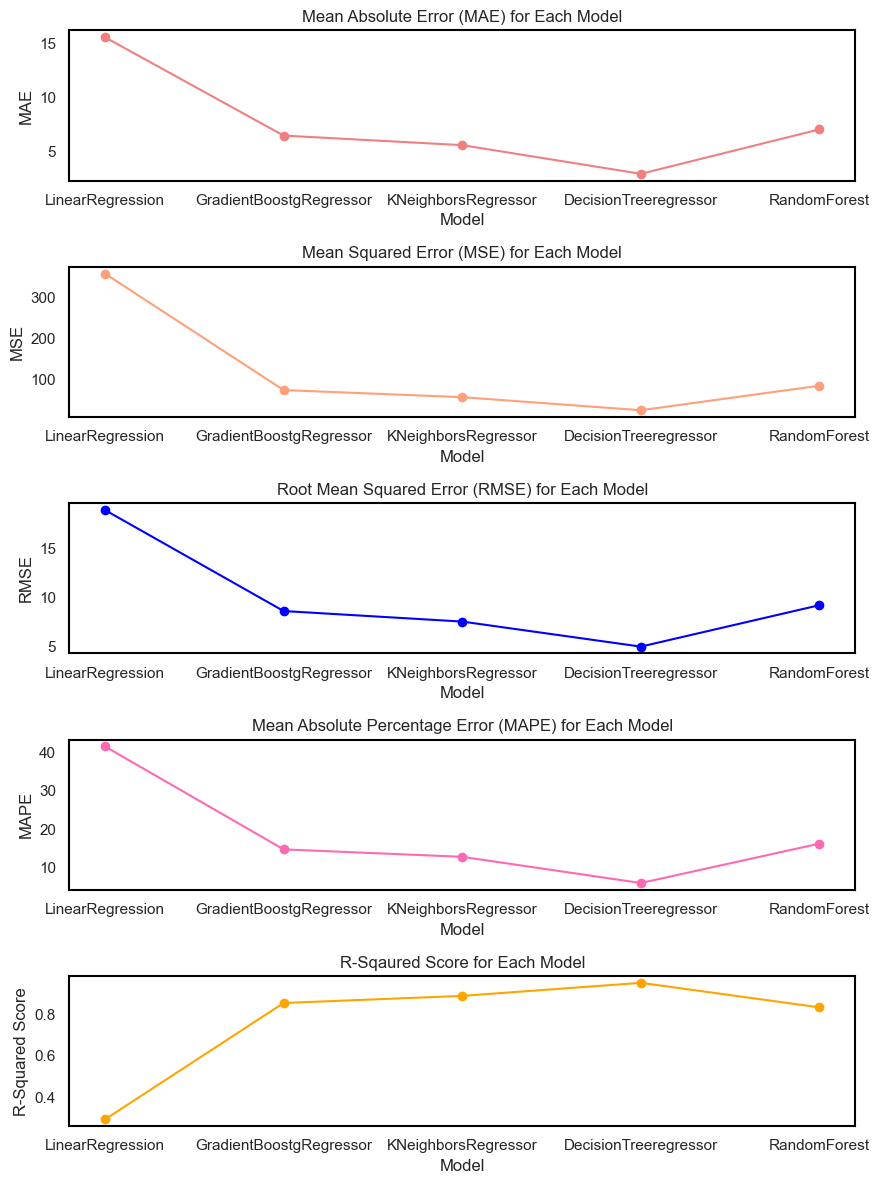

In [47]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'GradientBoostgRegressor', 'KNeighborsRegressor', 'DecisionTreeregressor', 'RandomForest']
mae_scores = [15.619237670923445, 6.4497706884182895,5.55847417633651,2.883991020859235,7.030034126734294 ]
mse_scores = [359.62066855024966,73.90256431271001,56.455451094946305,24.430552838720807,84.62326110328198]
rmse_scores = [18.96366706494948,8.596660067299975,7.513684255739411,4.942727267280768,9.199090232369828]
mape_scores = [41.52442871317679,14.772926814073564,12.833660792035392,6.023831992678887,16.27239499195233]
r2_scores = [0.29357418159888415,0.8548284788885752,0.8891009562833874,0.9520095067042189,0.8337691303404486]

fig, ax = plt.subplots(5, 1, figsize=(9, 12))

# Plot MAE
ax[0].plot(models, mae_scores, marker='o', color='lightcoral', linestyle='-')
ax[0].set_title('Mean Absolute Error (MAE) for Each Model')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MAE')

# Plot MSE
ax[1].plot(models, mse_scores, marker='o', color='lightsalmon', linestyle='-')
ax[1].set_title('Mean Squared Error (MSE) for Each Model')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('MSE')

# Plot RMSE
ax[2].plot(models, rmse_scores, marker='o', color='blue', linestyle='-')
ax[2].set_title('Root Mean Squared Error (RMSE) for Each Model')
ax[2].set_xlabel('Model')
ax[2].set_ylabel('RMSE')

# Plot MAPE
ax[3].plot(models, mape_scores, marker='o', color='hotpink', linestyle='-')
ax[3].set_title('Mean Absolute Percentage Error (MAPE) for Each Model')
ax[3].set_xlabel('Model')
ax[3].set_ylabel('MAPE')

ax[4].plot(models, r2_scores, marker='o',color='orange')
ax[4].set_title('R-Sqaured Score for Each Model')
ax[4].set_xlabel('Model')
ax[4].set_ylabel('R-Squared Score')

for a in ax:
    a.set_facecolor('white')  # Set axes background to white
    a.spines['top'].set_color('black')
    a.spines['bottom'].set_color('black')
    a.spines['left'].set_color('black')
    a.spines['right'].set_color('black')
    a.spines['top'].set_linewidth(1.5)
    a.spines['bottom'].set_linewidth(1.5)
    a.spines['left'].set_linewidth(1.5)
    a.spines['right'].set_linewidth(1.5)

plt.tight_layout()
plt.show()


In [48]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.predict(X_test)

array([60.59, 39.21, 81.68, ..., 75.9 , 23.32, 27.11])

In [49]:


# Prediction function with additional features (Year, Month, Day, Hour, Day_of_Week, Season)
def prediction(Year, Month, Day, Hour, Day_of_Week, Season):
    # Input validation
    if not (1 <= Month <= 12):
        return "Error: Month must be between 1 and 12."
    if not (1 <= Day <= 31):
        return "Error: Day must be between 1 and 31."
    if not (0 <= Hour <= 23):
        return "Error: Hour must be between 0 and 23."
    if not (0 <= Day_of_Week <= 6):
        return "Error: Day_of_Week must be between 0 (Sunday) and 6 (Saturday)."
    if not (0 <= Season <= 3):
        return "Error: Season must be between 0 and 3."
    
    # Create an array of the input features
    features = np.array([[Year, Month, Day, Hour, Day_of_Week, Season]], dtype=object)
    
    # Transform the features using the preprocessor
    
    # Make the prediction
    predicted_pm25 = dtr.predict(features)
    return predicted_pm25[0]

# Sample input for prediction
Year = 2018
Month = 4
Day = 27
Hour = 11
Day_of_Week = 4  # Example: Thursday
Season = 2    # Example: Summer (assuming 0: Winter, 1: Spring, 2: Summer, 3: Fall)

# Call the prediction function
predicted_value = prediction(Year, Month, Day, Hour, Day_of_Week, Season)

# Print the predicted value
if isinstance(predicted_value, str):
    print(predicted_value)  # In case of an error, print the error message
else:
    print(f"Predicted PM2.5 value: {predicted_value}")


Predicted PM2.5 value: 41.89


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [50]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))


In [51]:
import sklearn
print(sklearn.__version__)

1.3.2
